<h1>HW 4</h1>
Matt Buchovecky  
Astro 283

<h3>Reperform the fit and do a source subtraction again</h3>

In [62]:
import numpy
from astropy.io import fits 
from scipy import optimize
from matplotlib import pyplot 
%matplotlib inline 



In [63]:
star_fits = fits.open("./hw3prob1-data.fits")
star_data = star_fits[0].data
star_rav = star_data.ravel()


In [64]:
def symm_2d_gaussian(pos, F, xc, yc, sigma, B):
    return F*numpy.exp(-((pos[0]-xc)**2+(pos[1]-yc)**2)/(2*sigma**2)) + B
    

In [65]:
x_bins = star_data.shape[0]
y_bins = star_data.shape[1]

# Create x and y indices
x_arr = numpy.linspace(0, x_bins-1, x_bins)
y_arr = numpy.linspace(0, y_bins-1, y_bins)
x_arr, y_arr = numpy.meshgrid(x_arr, y_arr)
coords = x_arr, y_arr

x_rav = x_arr.ravel()
y_rav = y_arr.ravel()


In [66]:
init_guess = (50, 130, 130, 20, 100)
sigma_array = numpy.sqrt(star_data)
p_opt_singl, p_cov_singl = optimize.curve_fit(symm_2d_gaussian, (x_rav, y_rav), star_rav, init_guess, sigma_array.ravel())


(256, 256)


/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


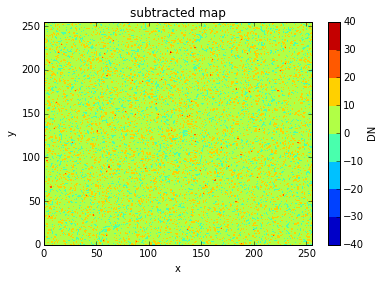

In [69]:
blank_sky = star_data - symm_2d_gaussian((x_arr,y_arr), *p_opt_singl)
print(blank_sky.shape)
contour = pyplot.contourf(blank_sky)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title("subtracted map")
cbar = pyplot.colorbar(label='DN')
#cbar.solids.set_edgecolors('face')


<h4>Chi squared test on subtraction</h4>

In [70]:
def chi_square_(function, params, x_vals, data_vals, var_vals):
    residuals = (data_vals - function(x_vals, *params))
    chis = (residuals**2)/var_vals
    chi_sum = numpy.sum(chis)
    d_o_f = len(x_vals) - len(params)
    return (chi_sum, d_o_f)

#part_func = partial(symm_2d_gaussian, pos)
c_s, d_o_f = chi_square_(symm_2d_gaussian, p_opt_singl, (x_rav,y_rav), star_rav, star_rav)
print(d_o_f)
print(c_s/d_o_f)
from functools import partial

-3
-7310.63382653


In [ ]:
# do it the simple way 
chi_s = numpy.sum(blank_sky**2/star_data)
dof = len(x_rav) - len(p_opt)
print(chi_s / dof)

<h4>Try to fit binary star</h4>

In [ ]:
def binary_star(pos, F1, xc1, yc1, sigma1, F2, xc2, yc2, sigma2, B):
    return F1*numpy.exp(-((pos[0]-xc1)**2+(pos[1]-yc1)**2)/(2*sigma1**2)) + F2*numpy.exp(-((pos[0]-xc2)**2+(pos[1]-yc2)**2)/(2*sigma2**2)) + B
    

In [ ]:
init_guess = (25, 130, 130, 15, 25, 130, 130, 15, 100)
sigma_array = numpy.sqrt(star_data)
p_opt_bin, p_cov_bin = optimize.curve_fit(binary_star, (x_rav, y_rav), star_rav, init_guess, sigma_array.ravel())


In [ ]:
print(p_opt)
print(p_cov)

In [ ]:
k = 3.0 # gain 
star_data_pe = k * star_data
